<a href="https://colab.research.google.com/github/santhoshredd/hello-World/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
# Data analysis and wrangling
import numpy as np     # Linear algebra
import pandas as pd    # File read & write operation

# Visualization
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pickle

# Machine Learning 
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.preprocessing import StandardScaler

In [58]:
# Loading the data from scikit learn library
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data,columns=boston.feature_names)
bos['MEDV']=boston.target
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [59]:
data=bos
print(data.shape)
print(data.info())    # Summary of data frame

(506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None


In [60]:
data.isnull().sum() # Finding the count of missing values from each column

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [61]:
# Summarizing the data to see distribution
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [62]:
X=data.drop(['MEDV'],axis=1)  # Removing the dependent variable from the dataset
y=data['MEDV']                # Making dependent variable (price) in y

Now, Let's see the relationship among the features and target column (Price)

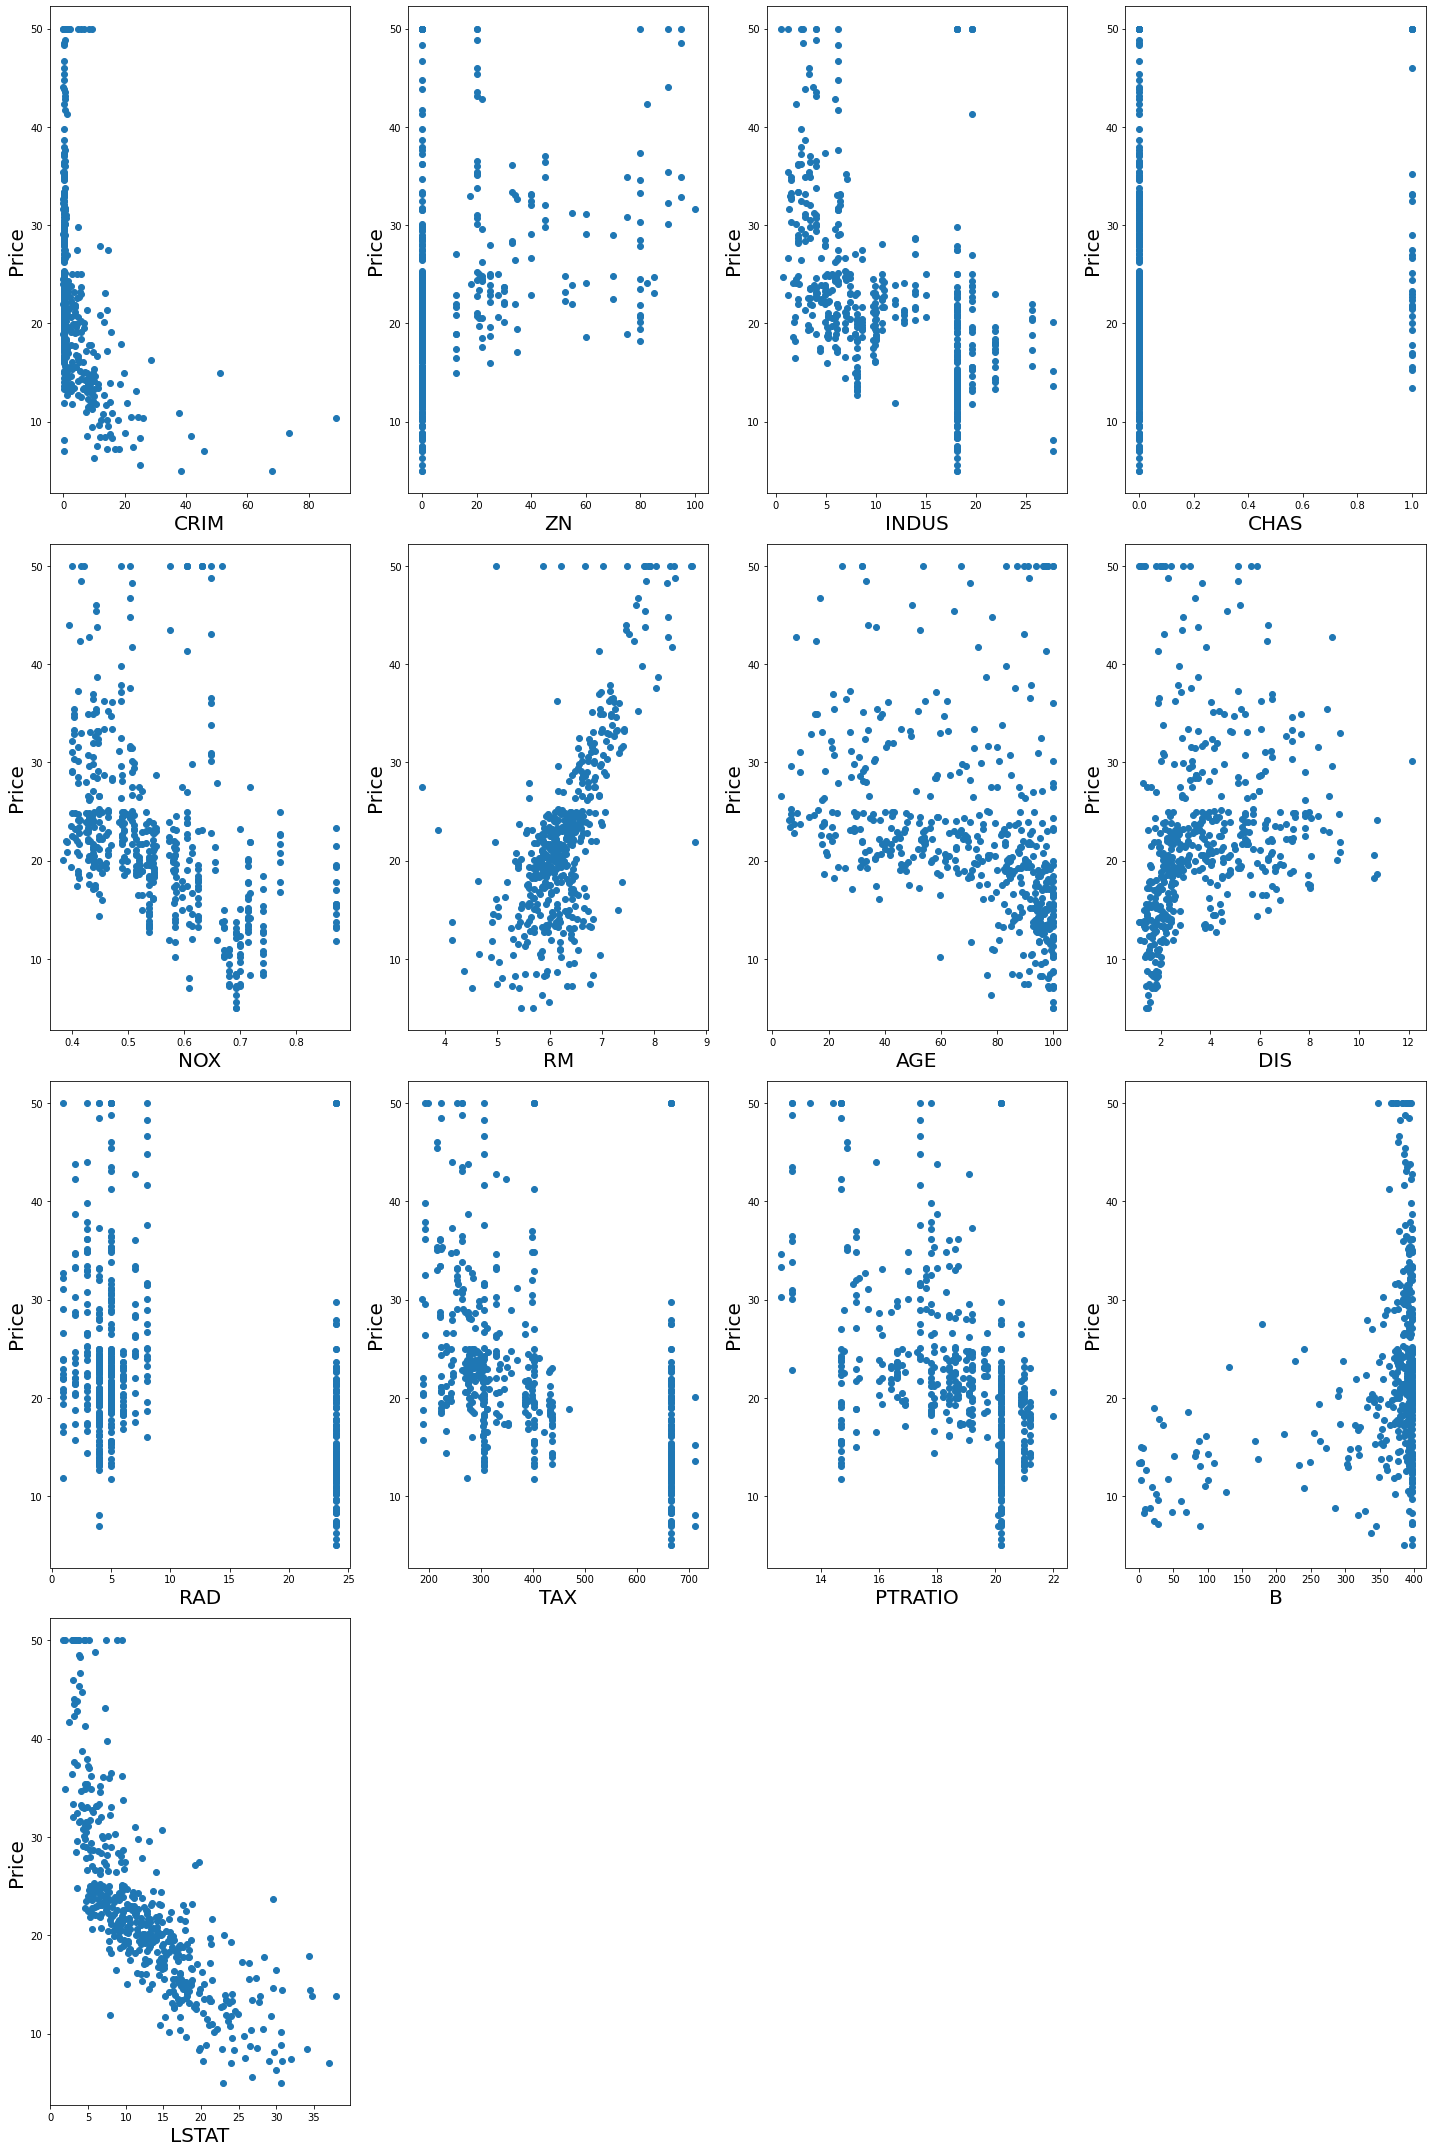

In [63]:
#Visulazing the relationship between the features and target variable using scatter plot
plt.figure(figsize=(20,30))
plotnumber=1
for column in X:
    if plotnumber<=15:
        ax=plt.subplot(4,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

From the plots we are understood that there is a linear relationship between the few features with the target column.
Now we are going to build a model using Linear Regression Algorithm.

### **Model Confidence**

In [64]:
lin_reg=smf.ols(formula='MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',data=data).fit()
lin_reg.conf_int()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 23 Dec 2020   Prob (F-statistic):          6.72e-135
Time:                        10:15:32   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For INDUS & AGE features the p-value of coefficient is greater than 0.05 which indicates, there is a high chance of getting zero coefficients for these two features. Now we need to check the relationship between these two features with target(price) column. If there is no relationship, then we can remove these two features otherwise we have to include as predictors.

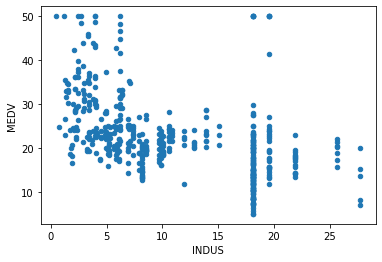

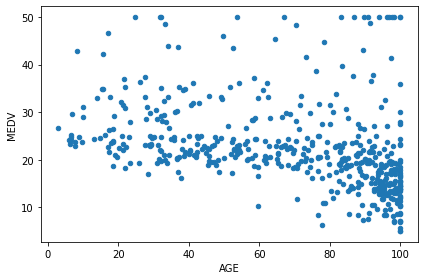

In [65]:
data.plot(kind='scatter',x='INDUS',y='MEDV')
data.plot(kind='scatter',x='AGE',y='MEDV')
plt.tight_layout()

So, by observing the above plots we understood that there is a linear relationship between the features(INDUS, AGE) with the target column. So, we are not going to remove any of these.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


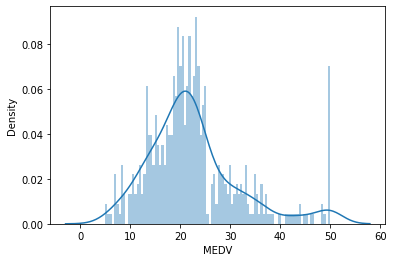

In [66]:
# Distribution of target variable: MEDV
sns.distplot(bos['MEDV'],bins=100)
plt.show()

**Multi-Collinearity**

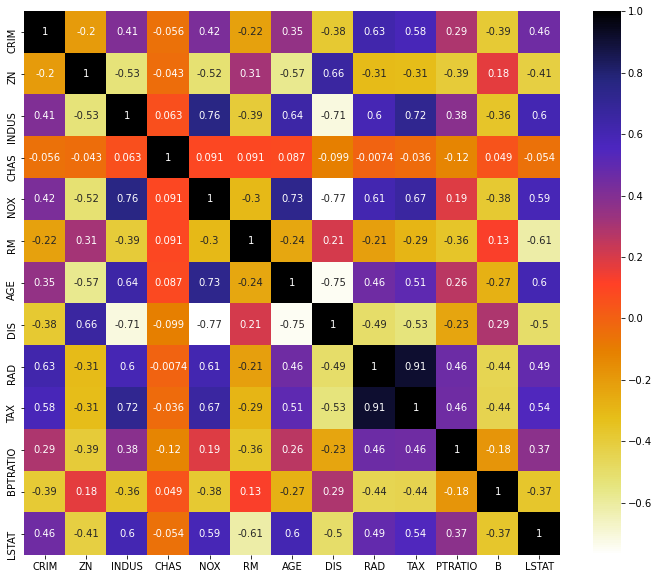

In [67]:
# Pearson Correlation
plt.figure(figsize=(12,10))
cor=X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [68]:
def correlation(X,threshold):
    col_corr=set()
    corr_matrix=X.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                col_name=corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [69]:
corr_features=correlation(X, 0.9)
print(len(set(corr_features)))
print(corr_features)

1
{'TAX'}


By seeing the above pearson correlation, we understood that there is a high correlation between TAX & RAD which means these two features are dependent on each other. So, we need to drop one feature. In this case I'm dropping the TAX column from both train & test data sets.

In [70]:
X.drop(['TAX'],axis=1,inplace=True)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,21.0,393.45,6.48


In [71]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=X_scaled
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
vif['Features']=X.columns
vif

,VIF,Features
0,1.791940,CRIM
1,2.184240,ZN
2,3.226015,INDUS
3,1.058220,CHAS
4,4.369271,NOX
5,1.923075,RM
6,3.098044,AGE
7,3.954446,DIS
8,2.837494,RAD
9,1.788839,PTRATIO


**Linear regression**

In [73]:
# Splitting the data into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=355)
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
print(lin_reg.intercept_)       #Value of y intercept

28.998973937082926


In [74]:
# Converting the coeeficient values to a dataframe
coeff=pd.DataFrame([X_train.columns,lin_reg.coef_]).T
coeff=coeff.rename(columns={0:'Attribute',1:'Coefficients'})
coeff

,Attribute,Coefficients
0,CRIM,-0.100772
1,ZN,0.0420754
2,INDUS,-0.102096
3,CHAS,4.06411
4,NOX,-17.7039
5,RM,4.47947
6,AGE,-0.0151954
7,DIS,-1.52261
8,RAD,0.116288
9,PTRATIO,-0.892174


In [75]:
# Saving the model to the local file system
filename='Lin_reg_final.pickle'
pickle.dump(lin_reg,open(filename,'wb'))

In [76]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))

In [77]:
# Predicting on test set
y_pred=loaded_model.predict(X_test)
y_pred

array([14.3745768 , 19.11154158, 31.30829355, 23.34735217,  6.88992094,
       23.83620148, 20.95836341, 19.26001394, 43.29043576, 20.65056235,
       25.25527036, 24.08124392, 26.05316089, 17.58530694, 10.45667407,
       33.90710342, 19.15217554, 18.60418841, 24.24958999, 17.32864699,
       19.47853896, 22.60743592, 32.80137869, 24.79050736, 35.65261561,
       25.15402348, 27.83636161, 35.87397487, 21.96013064, 26.3342165 ,
       21.13315782, 24.63454009, 15.66019449, 20.66624689, 19.12359257,
       24.25661213, 36.60210037, 18.53830636, 30.62211771, 32.38579804,
       22.77230952, 14.51978407, 19.13351154, 19.47563708, 19.814961  ,
       20.6644236 , 29.79408521, 17.59977169, 22.05300499, 18.04322845,
       18.36856341, 19.37046062, 15.22761045, 30.57807871, 46.07738552,
        6.52134282, 40.7687796 , 26.07443115, 16.28179704, 22.1635647 ,
        9.54236789, 22.84601796, 12.68632312, 22.24552933, 24.44497361,
        9.87479338, 26.65887807, 26.89157833, 17.31438561, 22.11

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


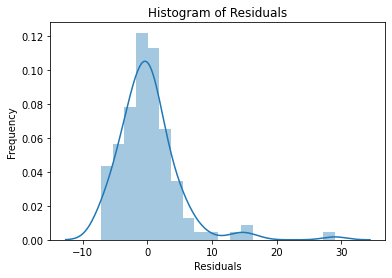

In [78]:
# Checking normality of errors
diff=y_test-y_pred
sns.distplot(diff)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

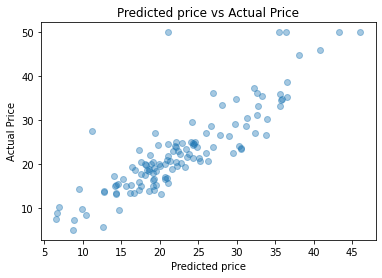

In [79]:
# Visualizing the differnece between actual & predicted prices
plt.scatter(x=y_pred,y=y_test,alpha=0.4)
plt.title('Predicted price vs Actual Price')
plt.xlabel('Predicted price')
plt.ylabel('Actual Price')
plt.show()

In [80]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = lin_reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [81]:
print('The adjusted r^2 score of model is:', lin_reg.score(X_train,y_train))
print('The adjusted r^2 score of model is:', adj_r2(X_train,y_train))
print('The adjusted r^2 score of model is:', lin_reg.score(X_test,y_test))
print('The adjusted r^2 score of model is:', adj_r2(X_test,y_test))

The adjusted r^2 score of model is: 0.7263352878677987
The adjusted r^2 score of model is: 0.7173626743552675
The adjusted r^2 score of model is: 0.7431889797578288
The adjusted r^2 score of model is: 0.7161562407849686


**Regularization**

In [82]:
# Lasso Regularization
lasscv=LassoCV(alphas=None,cv=10,max_iter=100000,normalize=True)
lasscv.fit(X_train,y_train)
alpha=lasscv.alpha_
alpha

0.00033837642965584014

In [83]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(X_train,y_train)
print('The Lasso regression r^2 score of model on training set is:', lasso_reg.score(X_train,y_train))
print('The Lasso regression r^2 score of model on test set is:', lasso_reg.score(X_test,y_test))

The Lasso regression r^2 score of model on training set is: 0.7263348005623693
The Lasso regression r^2 score of model on test set is: 0.7431929264422964


In [84]:
# Ridge regression
alphas=np.random.uniform(low=0,high=10, size=(50,))
ridgecv=RidgeCV(alphas=alphas,cv=10,normalize=True)
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([3.45749446, 0.04775088, 3.1930122 , 6.87570196, 4.76898815,
       4.7910741 , 8.1300371 , 5.23679274, 1.27443819, 3.6705126 ,
       1.81548046, 4.20353657, 1.78474995, 3.88216263, 4.55267165,
       4.89547532, 8.72109826, 6.65827406, 6.00568234, 5.65957377,
       2.84463523, 7.09084785, 3.64965515, 4.12900471, 9.52731322,
       0.79319346, 1.46133726, 7.94617712, 2.52889728, 4.86258263,
       2.84777025, 8.58758882, 7.5424032 , 7.83784265, 4.6880845 ,
       2.09414073, 5.42610457, 5.36778664, 0.7420844 , 4.55710264,
       8.33656214, 7.60718149, 3.90756972, 7.26911   , 1.50826785,
       4.03056211, 5.50121779, 2.12653459, 1.986178  , 4.23807551]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [85]:
ridgecv.alpha_

0.04775088302960029

In [86]:
ridge_model=Ridge(ridgecv.alpha_)
ridge_model.fit(X_train,y_train)
print('The Ridge regression r^2 score of model on training set is:', ridge_model.score(X_train,y_train))
print('The Ridge regression r^2 score of model on test set is:', ridge_model.score(X_test,y_test))

The Ridge regression r^2 score of model on training set is: 0.7263171331440842
The Ridge regression r^2 score of model on test set is: 0.7429706842514988


In [87]:
# Elastic Net
elasticCV=ElasticNetCV(alphas=None,cv=10)
elasticCV.fit(X_train,y_train)
elasticCV.alpha_

0.5788466808084044

In [88]:
elasticCV.l1_ratio

0.5

In [89]:
elasticnet_reg=ElasticNet(alpha=elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(X_train,y_train)
print('The ElasticNet regression r^2 score of model on training set is:', elasticnet_reg.score(X_train,y_train))
print('The ElasticNet regression r^2 score of model on test set is:', elasticnet_reg.score(X_test,y_test))

The ElasticNet regression r^2 score of model on training set is: 0.6735648150380654
The ElasticNet regression r^2 score of model on test set is: 0.7424512241334551


**Comparison of results with different regularization**

In [90]:
results=pd.DataFrame({'Method type':['Linear Regression','Lasso','Ridge','Elastic net'],'r^2 score (Train)':[lin_reg.score(X_train,y_train),lasso_reg.score(X_train,y_train),ridge_model.score(X_train,y_train),elasticnet_reg.score(X_train,y_train)],'Adj r^2 score (Train)':[adj_r2(X_train,y_train),'-','-','-'],'r^2 score (Test)':[lin_reg.score(X_test,y_test),lasso_reg.score(X_test,y_test),ridge_model.score(X_test,y_test),elasticnet_reg.score(X_test,y_test)],'Adj r^2 score (Test)':[adj_r2(X_test,y_test),'-','-','-']})
results

,Method type,r^2 score (Train),Adj r^2 score (Train),r^2 score (Test),Adj r^2 score (Test)
0,Linear Regression,0.726335,0.717363,0.743189,0.716156
1,Lasso,0.726335,-,0.743193,-
2,Ridge,0.726317,-,0.742971,-
3,Elastic net,0.673565,-,0.742451,-


We can observe the above comparison table, even after using the Lasso & Ridge regularization, still we are getting the same r2 score. That means our OLS model has been well trained over the training data and there is no overfitting.